In [21]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn import datasets, linear_model
from bs4 import BeautifulSoup
import requests
import re
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [10]:
df = pd.read_csv("datacapstone.csv") #importing manually scraped excel
df = pd.DataFrame(df)
df['Homeruns'] = df[["Homeruns 2021", "Homeruns 2022"]].mean(axis=1) #averaging home runs over 2021/2022
df[["Attendance"]] = df[["Attendance"]].apply(pd.to_numeric) #converting attendance to integers
df1 = df[["Team Name", "Stadium","Stadium Type", "Humidity (afternoons in march-oct)", "Left (feet)", "Right (feet)", "Center (feet)","Altitude", "WOBA", "Attendance", "Homeruns"]] #specifying data we want
df1 = df1.sort_values(["Homeruns"], ascending=False) #sort in descending home run averages
display(df1[["Team Name", "Stadium", "Stadium Type", "Altitude", "Humidity (afternoons in march-oct)", "Left (feet)", "Right (feet)", "Center (feet)", "WOBA", "Altitude", "Attendance", "Homeruns"]])

,Team Name,Stadium,Stadium Type,Altitude,Humidity (afternoons in march-oct),Left (feet),Right (feet),Center (feet),WOBA,Altitude,Attendance,Homeruns
7,Cincinnati Reds,Great American Ball Park,0,550,56,327.0,325.0,404.0,112,550,17447,233.5
3,Baltimore Orioles,Camden Yards,0,20,52,384.0,318.0,400.0,95,20,17543,214.0
14,Los Angeles Dodgers,Dodger Stadium,0,340,56,330.0,330.0,395.0,107,340,47641,213.5
29,Washington Nationals,Nationals Park,0,7,52,336.0,335.0,402.0,99,7,25017,208.0
5,Chicago Cubs,Wrigley Field,0,595,56,355.0,353.0,400.0,99,595,32305,203.0
0,Los Angeles Angels,Angel Stadium,0,160,55,330.0,330.0,396.0,106,160,30339,202.0
9,Colorado Rockies,Coors Field,0,5280,39,347.0,350.0,415.0,113,5280,32467,201.0
16,Minnesota Twins,Target Field,0,815,55,339.0,328.0,411.0,99,815,22514,201.0
15,Milwaukee Brewers,Miller Park,1,635,61,342.0,345.0,400.0,101,635,30155,200.0
2,Atlanta Braves,Truist Park,0,1050,54,335.0,325.0,400.0,103,1050,38641,200.0


In [11]:
page = "https://www.fantasypros.com/mlb/park-factors.php" #scraping from website
html = requests.get(page)
soup = BeautifulSoup(html.text, 'html.parser')
table = soup.find("table", id="data-table")
rows = table.find_all('tr')
data = []

for row in rows: #pulling table from site
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Print the extracted data
data = data[1:]
df = pd.DataFrame(data) #converting to data frame
df = df.iloc[::3, :] 

df[[1,2,3,4,5]] = df[[1,2,3,4,5]].apply(pd.to_numeric) #converting to integer values
df[[0]] = df[[0]].astype(str) #converting to string value

df['Average'] = df[[1,2,3,4,5]].mean(axis=1) #average ball park factor

df.rename(columns = {0:"field", 1:'runs', 2:'hr', 3:"1b", 4:"2b", 5:"3b"}, inplace = True) #renaming cols
df['Team Name'] = df['field'].str.extract(r"\((.*?)\)", expand=False) #seperating team name and stadium to create new team name column

sorted_df = df.sort_values(by=["Average"], ascending=False) #sort by average
display(sorted_df)

,field,runs,hr,1b,2b,3b,Average,Team Name
24,Coors Field(Colorado Rockies),1.367,1.267,1.173,1.264,1.803,1.3748,Colorado Rockies
9,Fenway Park(Boston Red Sox),1.210,1.095,1.116,1.298,1.643,1.2724,Boston Red Sox
27,Comerica Park(Detroit Tigers),0.925,0.738,0.980,1.045,2.286,1.1948,Detroit Tigers
18,Great American Ball Park(Cincinnati Reds),1.221,1.518,1.038,1.080,0.693,1.1100,Cincinnati Reds
33,Kauffman Stadium(Kansas City Royals),1.087,0.834,1.132,1.202,1.224,1.0958,Kansas City Royals
36,Angel Stadium(Los Angeles Angels),1.096,1.242,1.031,0.971,1.040,1.0760,Los Angeles Angels
69,Oracle Park(San Francisco Giants),0.984,0.800,1.023,1.134,1.396,1.0674,San Francisco Giants
60,Citizens Bank Park(Philadelphia Phillies),0.999,1.100,0.975,0.968,1.257,1.0598,Philadelphia Phillies
0,Chase Field(Arizona Diamondbacks),1.038,0.789,1.094,1.150,1.164,1.0470,Arizona Diamondbacks
42,loanDepot park(Miami Marlins),0.960,0.939,1.023,1.001,1.306,1.0458,Miami Marlins


In [12]:
new_df = pd.merge(df1, sorted_df, on='Team Name') #merging two data frames by team
new_df = new_df[["Team Name", "Stadium", "Stadium Type", "Altitude", "Humidity (afternoons in march-oct)","Left (feet)", "Right (feet)", "Center (feet)", "Attendance", "Homeruns", "Average", "WOBA"]] #specifying what data we want to keep
new_df.rename(columns = {"Humidity (afternoons in march-oct)": "Humidity", "Average":"Park Factor"}, inplace = True) #cleaning names
new_df = new_df.sort_values(by=["Homeruns"], ascending=False) #sort by home runs
display(new_df)

,Team Name,Stadium,Stadium Type,Altitude,Humidity,Left (feet),Right (feet),Center (feet),Attendance,Homeruns,Park Factor,WOBA
0,Cincinnati Reds,Great American Ball Park,0,550,56,327.0,325.0,404.0,17447,233.5,1.1100,112
1,Baltimore Orioles,Camden Yards,0,20,52,384.0,318.0,400.0,17543,214.0,0.9710,95
2,Los Angeles Dodgers,Dodger Stadium,0,340,56,330.0,330.0,395.0,47641,213.5,0.9910,107
3,Washington Nationals,Nationals Park,0,7,52,336.0,335.0,402.0,25017,208.0,0.9306,99
4,Chicago Cubs,Wrigley Field,0,595,56,355.0,353.0,400.0,32305,203.0,1.0312,99
5,Los Angeles Angels,Angel Stadium,0,160,55,330.0,330.0,396.0,30339,202.0,1.0760,106
6,Colorado Rockies,Coors Field,0,5280,39,347.0,350.0,415.0,32467,201.0,1.3748,113
7,Minnesota Twins,Target Field,0,815,55,339.0,328.0,411.0,22514,201.0,0.9174,99
8,Milwaukee Brewers,Miller Park,1,635,61,342.0,345.0,400.0,30155,200.0,1.0014,101
9,Atlanta Braves,Truist Park,0,1050,54,335.0,325.0,400.0,38641,200.0,0.9710,103


                            OLS Regression Results                            
Dep. Variable:               Homeruns   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.4577
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.504
Time:                        15:20:35   Log-Likelihood:                -136.33
No. Observations:                  30   AIC:                             276.7
Df Residuals:                      28   BIC:                             279.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        181.8688      4.897     37.138      0.0

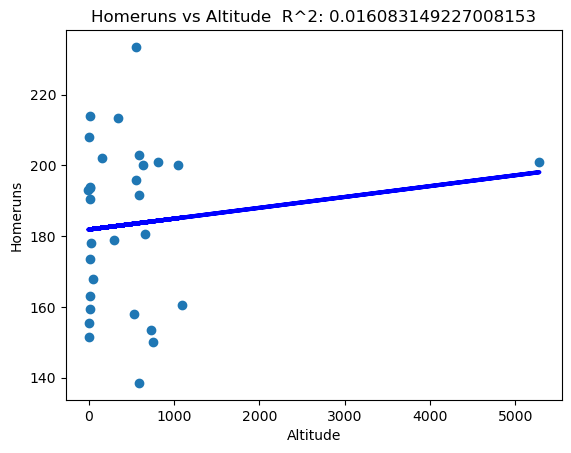

In [14]:
x = new_df[["Altitude"]] #independent
y = new_df[["Homeruns"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #regression line
regr.fit(x, y) #plotting
plt.plot(x,y, "o")
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting regression
plt.title(f"Homeruns vs Altitude  R^2: {r_squared}") #title
plt.xlabel("Altitude")
plt.ylabel("Homeruns")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Homeruns   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.441
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.240
Time:                        15:20:38   Log-Likelihood:                -135.82
No. Observations:                  30   AIC:                             275.6
Df Residuals:                      28   BIC:                             278.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          70.7988     93.940      0.754      

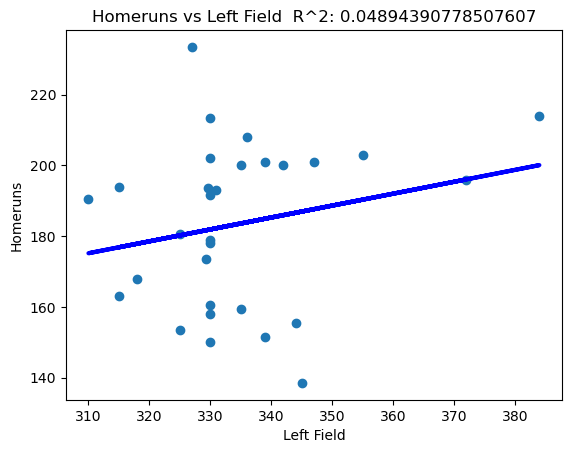

In [15]:
x = new_df[["Left (feet)"]] #independent
y = new_df[["Homeruns"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #regression line
regr.fit(x, y) #plotting
plt.plot(x,y, "o")
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting regression
plt.title(f"Homeruns vs Left Field  R^2: {r_squared}") #title
plt.xlabel("Left Field")
plt.ylabel("Homeruns")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Homeruns   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.6145
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.440
Time:                        15:20:41   Log-Likelihood:                -136.25
No. Observations:                  30   AIC:                             276.5
Df Residuals:                      28   BIC:                             279.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           78.2761    134.238      0.583   

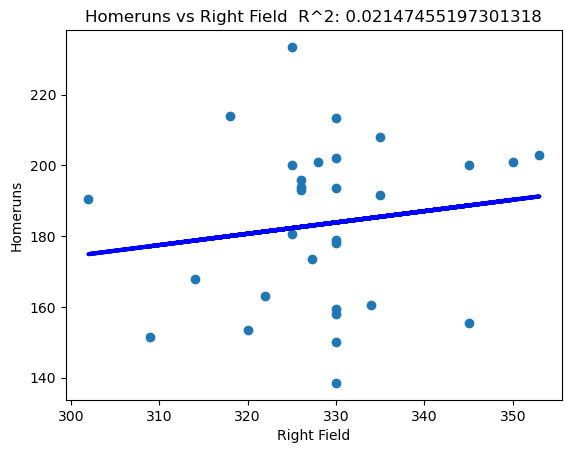

In [16]:
x = new_df[["Right (feet)"]] #independent
y = new_df[["Homeruns"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #regression line
regr.fit(x, y) #plotting
plt.plot(x,y, "o")
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting regression
plt.title(f"Homeruns vs Right Field  R^2: {r_squared}") #title
plt.xlabel("Right Field")
plt.ylabel("Homeruns")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Homeruns   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.3825
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.541
Time:                        18:48:49   Log-Likelihood:                -136.37
No. Observations:                  30   AIC:                             276.7
Df Residuals:                      28   BIC:                             279.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           315.3275    213.265      1.479

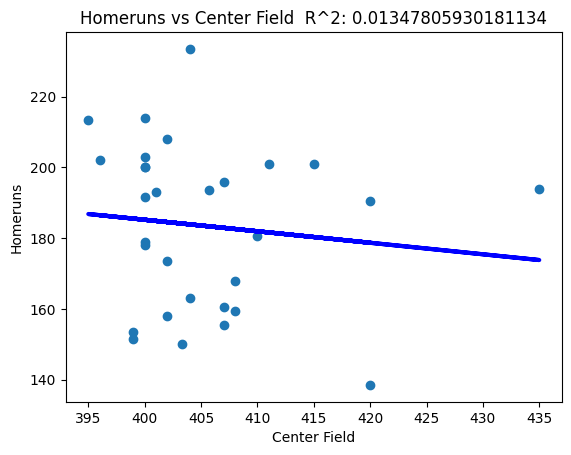

In [ ]:
x = new_df[["Center (feet)"]] #independent
y = new_df[["Homeruns"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #regression line
regr.fit(x, y) #plotting
plt.plot(x,y, "o")
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting regression
plt.title(f"Homeruns vs Center Field  R^2: {r_squared}") #title
plt.xlabel("Center Field")
plt.ylabel("Homeruns")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Homeruns   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                   0.05708
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.813
Time:                        18:48:51   Log-Likelihood:                -136.55
No. Observations:                  30   AIC:                             277.1
Df Residuals:                      28   BIC:                             279.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        190.1540     28.393      6.697      0.0

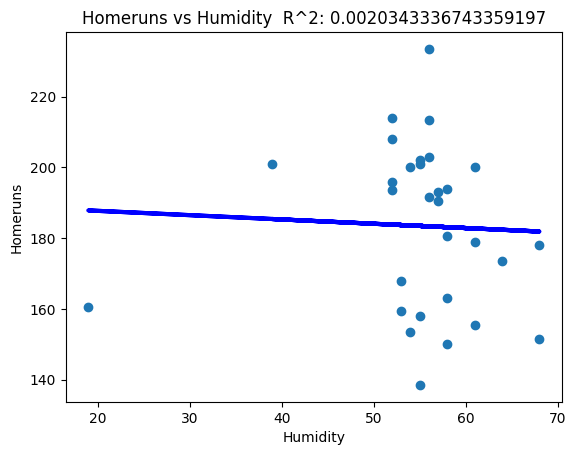

In [ ]:
x = new_df[["Humidity"]] #independent
y = new_df[["Homeruns"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #regression line
regr.fit(x, y) #plotting
plt.plot(x,y, "o")
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting regression
plt.title(f"Homeruns vs Humidity  R^2: {r_squared}") #title
plt.xlabel("Humidity")
plt.ylabel("Homeruns")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Homeruns   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.390
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.248
Time:                        18:48:52   Log-Likelihood:                -135.85
No. Observations:                  30   AIC:                             275.7
Df Residuals:                      28   BIC:                             278.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        169.2123     12.796     13.223      0.0

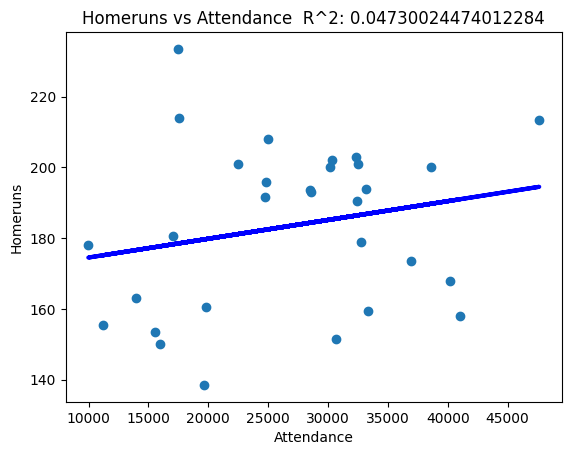

In [ ]:
x = new_df[["Attendance"]] #independent
y = new_df[["Homeruns"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #regression line
regr.fit(x, y) #plotting
plt.plot(x,y, "o")
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting regression
plt.title(f"Homeruns vs Attendance  R^2: {r_squared}") #title
plt.xlabel("Attendance")
plt.ylabel("Homeruns")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

In [23]:
X = new_df[["Altitude","Attendance", "Humidity", "Park Factor","Left (feet)", "Right (feet)", "Center (feet)"]] #independent vars
y = new_df[["Homeruns"]] #dependent
x = sm.add_constant(X)
x.reindex(y.index)
model = sm.OLS(y, x).fit() #creating regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Homeruns   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                 -0.148
Method:                 Least Squares   F-statistic:                    0.4644
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.850
Time:                        15:23:47   Log-Likelihood:                -134.51
No. Observations:                  30   AIC:                             285.0
Df Residuals:                      22   BIC:                             296.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            90.7410    347.780      0.261

                            OLS Regression Results                            
Dep. Variable:            Park Factor   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     13.69
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           0.000933
Time:                        18:48:56   Log-Likelihood:                 26.463
No. Observations:                  30   AIC:                            -48.93
Df Residuals:                      28   BIC:                            -46.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9679      0.022     44.935      0.0

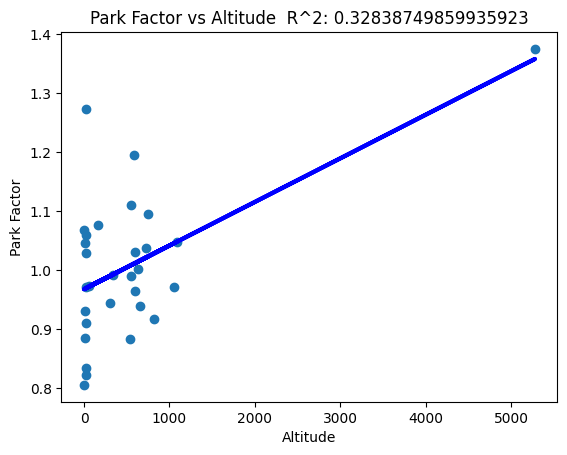

In [ ]:
x = new_df[["Altitude"]] #independent
y = new_df[["Park Factor"]] #dependent

model = LinearRegression() # running regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #getting regression line
regr.fit(x, y)
plt.plot(x,y, "o") #plotting
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting line
plt.title(f"Park Factor vs Altitude  R^2: {r_squared}") #title
plt.xlabel("Altitude")
plt.ylabel("Park Factor")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Park Factor   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                   0.04706
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.830
Time:                        18:48:56   Log-Likelihood:                 20.517
No. Observations:                  30   AIC:                            -37.03
Df Residuals:                      28   BIC:                            -34.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.8949      0.512      1.746      

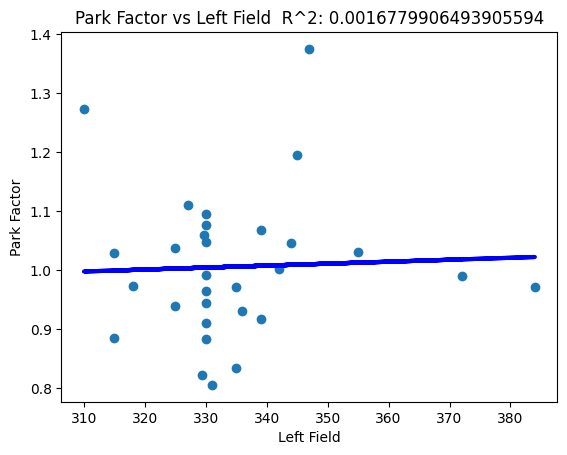

In [ ]:
x = new_df[["Left (feet)"]] #independent
y = new_df[["Park Factor"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #regression line
regr.fit(x, y) #plotting
plt.plot(x,y, "o")
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting regression
plt.title(f"Park Factor vs Left Field  R^2: {r_squared}") #title
plt.xlabel("Left Field")
plt.ylabel("Park Factor")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Park Factor   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.1032
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.750
Time:                        18:48:58   Log-Likelihood:                 20.547
No. Observations:                  30   AIC:                            -37.09
Df Residuals:                      28   BIC:                            -34.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7744      0.721      1.074   

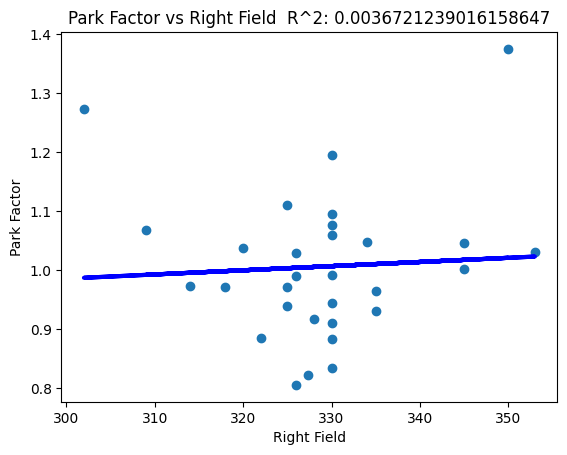

In [ ]:
x = new_df[["Right (feet)"]] #independent
y = new_df[["Park Factor"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #regression line
regr.fit(x, y) #plotting
plt.plot(x,y, "o")
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting regression
plt.title(f"Park Factor vs Right Field  R^2: {r_squared}") #title
plt.xlabel("Right Field")
plt.ylabel("Park Factor")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Park Factor   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     5.209
Date:                Thu, 27 Apr 2023   Prob (F-statistic):             0.0303
Time:                        18:48:58   Log-Likelihood:                 23.051
No. Observations:                  30   AIC:                            -42.10
Df Residuals:                      28   BIC:                            -39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3891      1.050     -1.323

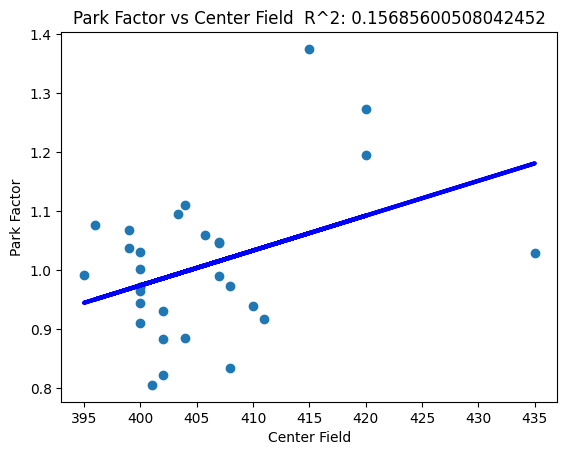

In [ ]:
x = new_df[["Center (feet)"]] #independent
y = new_df[["Park Factor"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #regression line
regr.fit(x, y) #plotting
plt.plot(x,y, "o")
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting regression
plt.title(f"Park Factor vs Center Field  R^2: {r_squared}") #title
plt.xlabel("Center Field")
plt.ylabel("Park Factor")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Park Factor   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     2.546
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.122
Time:                        18:48:58   Log-Likelihood:                 21.797
No. Observations:                  30   AIC:                            -39.59
Df Residuals:                      28   BIC:                            -36.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2343      0.145      8.521      0.0

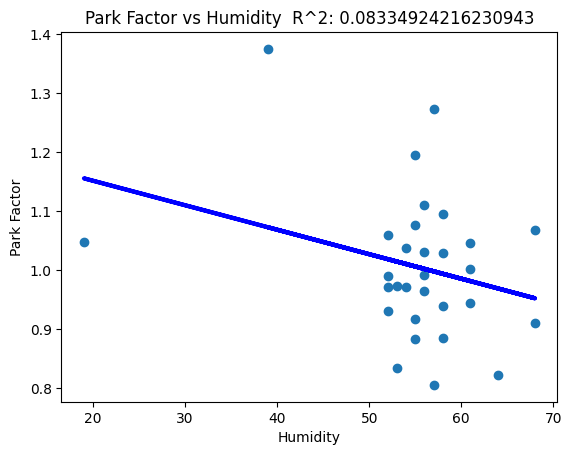

In [ ]:
x = new_df[["Humidity"]] #independent
y = new_df[["Park Factor"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #regression line
regr.fit(x, y) #plotting
plt.plot(x,y, "o")
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting regression
plt.title(f"Park Factor vs Humidity  R^2: {r_squared}") #title
plt.xlabel("Humidity")
plt.ylabel("Park Factor")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Park Factor   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                   0.09504
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.760
Time:                        18:49:00   Log-Likelihood:                 20.543
No. Observations:                  30   AIC:                            -37.09
Df Residuals:                      28   BIC:                            -34.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0262      0.070     14.728      0.0

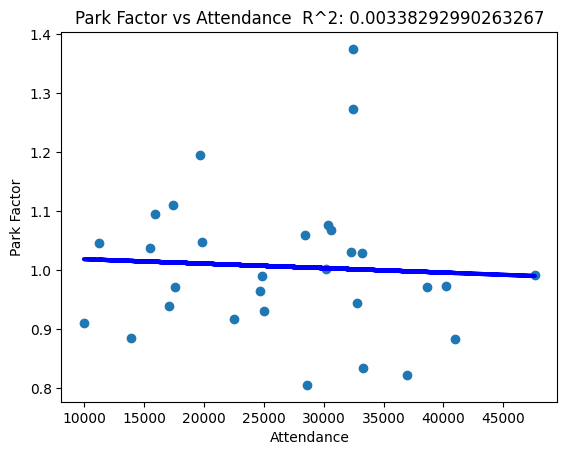

In [ ]:
x = new_df[["Attendance"]] #independent
y = new_df[["Park Factor"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #regression line
regr.fit(x, y) #plotting
plt.plot(x,y, "o")
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting regression
plt.title(f"Park Factor vs Attendance  R^2: {r_squared}") #title
plt.xlabel("Attendance")
plt.ylabel("Park Factor")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

In [18]:
X = new_df[["Altitude","Attendance", "Humidity","Left (feet)", "Right (feet)", "Center (feet)"]] #independent
y = new_df[["Park Factor"]] #dependent
x = sm.add_constant(X)
x.reindex(y.index)
model = sm.OLS(y, x).fit() #regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Park Factor   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     3.205
Date:                Thu, 27 Apr 2023   Prob (F-statistic):             0.0195
Time:                        15:21:30   Log-Likelihood:                 29.606
No. Observations:                  30   AIC:                            -45.21
Df Residuals:                      23   BIC:                            -35.40
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0378      1.432     -0.026

                            OLS Regression Results                            
Dep. Variable:                   WOBA   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.480
Date:                Thu, 27 Apr 2023   Prob (F-statistic):             0.0266
Time:                        18:49:04   Log-Likelihood:                -91.509
No. Observations:                  30   AIC:                             187.0
Df Residuals:                      28   BIC:                             189.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.7386      1.099     89.835      0.0

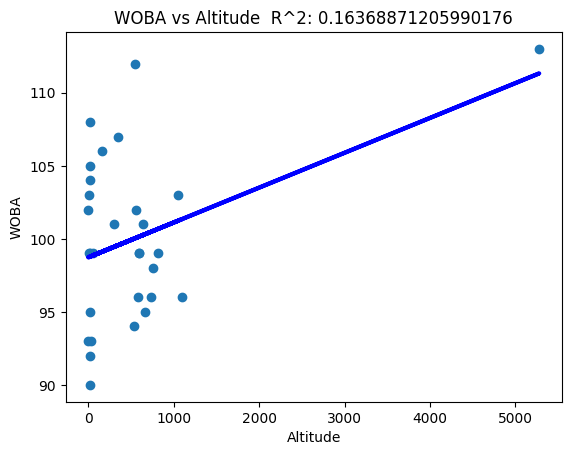

In [ ]:
x = new_df[["Altitude"]] #independent var
y = new_df[["WOBA"]] #dependent var

model = LinearRegression() #run regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #fit reg line
regr.fit(x, y) #plotting
plt.plot(x,y, "o") #plot values
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plot line
plt.title(f"WOBA vs Altitude  R^2: {r_squared}")  #title
plt.xlabel("Altitude")
plt.ylabel("WOBA")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WOBA   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.1743
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.680
Time:                        18:49:05   Log-Likelihood:                -94.097
No. Observations:                  30   AIC:                             192.2
Df Residuals:                      28   BIC:                             195.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         109.7153     23.377      4.693      

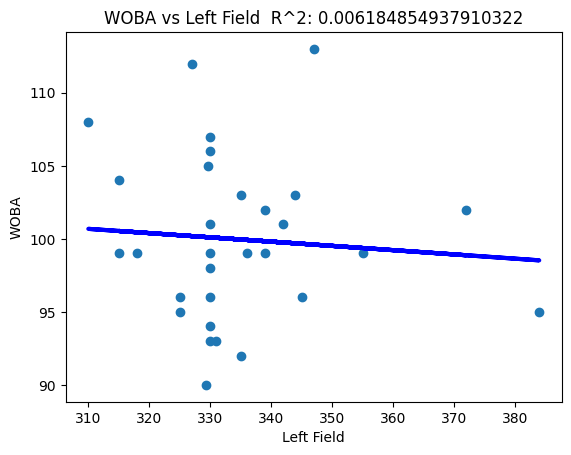

In [ ]:
x = new_df[["Left (feet)"]] #independent
y = new_df[["WOBA"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #regression line
regr.fit(x, y) #plotting
plt.plot(x,y, "o")
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting regression
plt.title(f"WOBA vs Left Field  R^2: {r_squared}") #title
plt.xlabel("Left Field")
plt.ylabel("WOBA")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WOBA   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.1108
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.742
Time:                        18:49:06   Log-Likelihood:                -94.131
No. Observations:                  30   AIC:                             192.3
Df Residuals:                      28   BIC:                             195.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           88.9958     32.970      2.699   

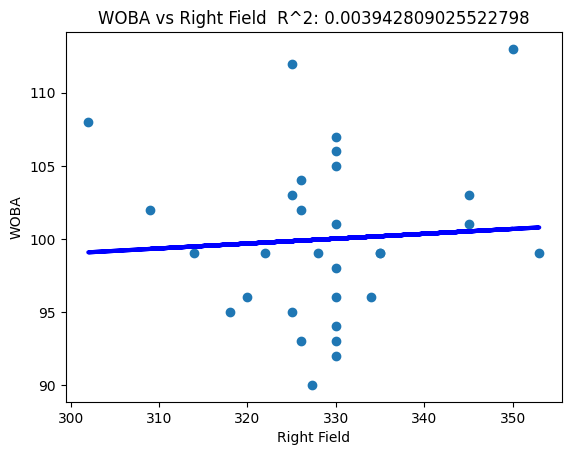

In [ ]:
x = new_df[["Right (feet)"]] #independent
y = new_df[["WOBA"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #regression line
regr.fit(x, y) #plotting
plt.plot(x,y, "o")
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting regression
plt.title(f"WOBA vs Right Field  R^2: {r_squared}") #title
plt.xlabel("Right Field")
plt.ylabel("WOBA")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WOBA   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.060
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.312
Time:                        18:49:06   Log-Likelihood:                -93.633
No. Observations:                  30   AIC:                             191.3
Df Residuals:                      28   BIC:                             194.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            47.1620     51.309      0.919

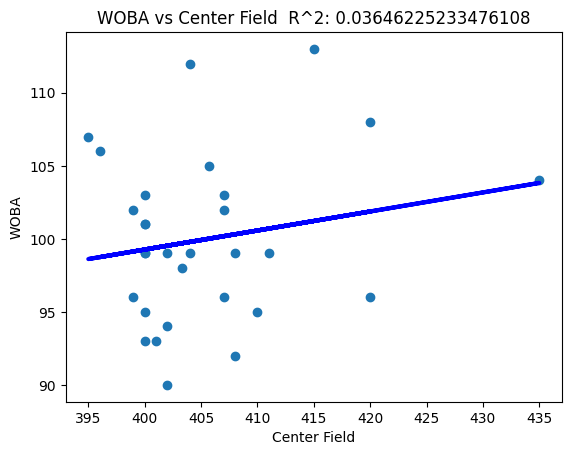

In [ ]:
x = new_df[["Center (feet)"]] #independent
y = new_df[["WOBA"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y)
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #getting regression line
regr.fit(x, y) #plotting
plt.plot(x,y, "o") #plotting points
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting line
plt.title(f"WOBA vs Center Field  R^2: {r_squared}") #title
plt.xlabel("Center Field")
plt.ylabel("WOBA")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WOBA   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.3837
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.541
Time:                        18:49:07   Log-Likelihood:                -93.986
No. Observations:                  30   AIC:                             192.0
Df Residuals:                      28   BIC:                             194.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.1739      6.872     15.159      0.0

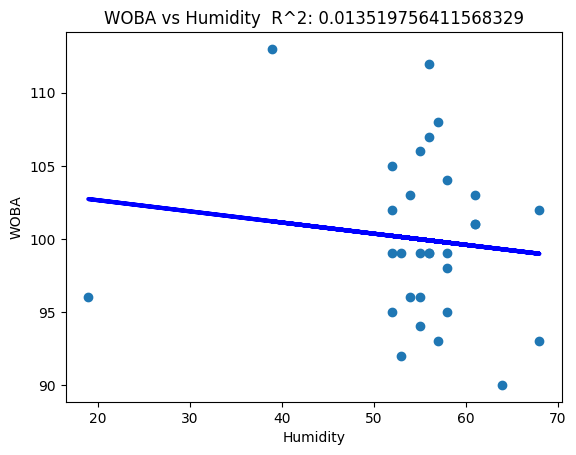

In [ ]:
x = new_df[["Humidity"]] #independent
y = new_df[["WOBA"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y) #plotting
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #regression line
regr.fit(x, y)
plt.plot(x,y, "o")
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting regression
plt.title(f"WOBA vs Humidity  R^2: {r_squared}") #title
plt.xlabel("Humidity")
plt.ylabel("WOBA")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WOBA   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.027
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.320
Time:                        18:49:07   Log-Likelihood:                -93.650
No. Observations:                  30   AIC:                             191.3
Df Residuals:                      28   BIC:                             194.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.9693      3.135     30.935      0.0

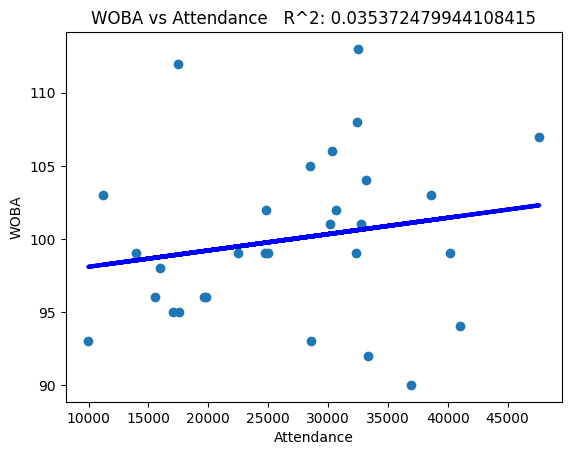

In [ ]:
x = new_df[["Attendance"]] #independent
y = new_df[["WOBA"]] #dependent

model = LinearRegression() #running regression
model.fit(x, y) #plotting
r_squared = model.score(x, y)

regr = linear_model.LinearRegression() #regression line
regr.fit(x, y)
plt.plot(x,y, "o")
plt.plot(x, regr.predict(x), color='blue', linewidth=3) #plotting regression
plt.title(f"WOBA vs Attendance   R^2: {r_squared}") #title
plt.xlabel("Attendance")
plt.ylabel("WOBA")

x = sm.add_constant(x) #regression summary
x.reindex(y.index)
model = sm.OLS(y, x).fit()
print(model.summary())

In [ ]:
X = new_df[["Altitude","Attendance", "Humidity","Left (feet)", "Right (feet)", "Center (feet)"]] #independent
y = new_df[["WOBA"]] #dependent
x = sm.add_constant(X)
x.reindex(y.index)
model = sm.OLS(y, x).fit() #regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WOBA   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.138
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.372
Time:                        18:49:07   Log-Likelihood:                -90.292
No. Observations:                  30   AIC:                             194.6
Df Residuals:                      23   BIC:                             204.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            89.1332     77.900      1.144

In [22]:
data = pd.read_csv('datacapstone.csv') #import scraped csv file

x = data['Stadium Type'] #create x variable for stadium type, the independent variable
y = data['WOBA'] #create y variable for WOBA, the dependent variable

#initialize variables as empty lists
index1 = [] #index1 represents all 'zeros' or outdoor stadiums
index2 = [] #index2 represents all 'ones' or indoor stadiums


for i in range(len(x)): #iterate through x to indicate which indexes are either indoor/outdoor
  if x[i] == 0:
    index1.append(i)
  elif x[i] == 1:
    index2.append(i)

#initialize group1 and group2 variables as empty lists
group1 = [] #group1 contains outdoor WOBA values
group2 = [] #group2 contains indoor WOBA values

for j in index1: #iterate through index1, appending WOBA values to group1 list
  group1.append(y[j])

for i in index2: #iterate through index2, appending WOBA values to group2 list
  group2.append(y[i])

#use mannwhitneyu() with group1 and group2 as parameters
statistic, p_value = stats.mannwhitneyu(group1, group2)

print(f'Mann-Whitney U statistic: {statistic}') #print test statistic
print(f'p-value: {p_value}') #print p-value



Mann-Whitney U statistic: 81.0
p-value: 0.7593462474990416


In [24]:
#Mann-Whitney U t-test- indoor vs outdoor: homeruns 2022

data = pd.read_csv('datacapstone.csv') #import scraped csv file

x = data['Stadium Type'] #create x variable for stadium type, the independent variable
y = data['Homeruns 2022'] #create y variable for Homeruns 2022, the dependent variable

#initialize variables as empty lists
index1 = [] #index1 represents all 'zeros' or outdoor stadiums
index2 = [] #index2 represents all 'ones' or indoor stadiums


for i in range(len(x)): #iterate through x to indicate which indexes are either indoor/outdoor
  if x[i] == 0:
    index1.append(i)
  elif x[i] == 1:
    index2.append(i)

#initialize group1 and group2 variables as empty lists
group1 = [] #group1 contains outdoor homerun values
group2 = [] #group2 contains indoor homerun values

for j in index1: #iterate through index1, appending homerun values to group1 list
  group1.append(y[j])

for i in index2: #iterate through index2, appending homerun values to group2 list
  group2.append(y[i])

#use mannwhitneyu() with group1 and group2 as parameters
statistic, p_value = stats.mannwhitneyu(group1, group2)

print(f'Mann-Whitney U statistic: {statistic}') #print test statistic
print(f'p-value: {p_value}') #print p-value


Mann-Whitney U statistic: 64.0
p-value: 0.270364570484833


In [25]:
#Mann-Whitney U t-test- indoor vs outdoor: total runs 
data = pd.read_csv('datacapstone.csv') #import scraped csv file

x = data['Stadium Type'] #create x variable for stadium type, the independent variable
y = data['Total Runs 2022'] #create y variable for Total Runs 2022, the dependent variable

#initialize variables as empty lists
index1 = [] #index1 represents all 'zeros' or outdoor stadiums
index2 = [] #index2 represents all 'ones' or indoor stadiums


for i in range(len(x)): #iterate through x to indicate which indexes are either indoor/outdoor
  if x[i] == 0:
    index1.append(i)
  elif x[i] == 1:
    index2.append(i)

#initialize group1 and group2 variables as empty lists
group1 = [] #group1 contains outdoor total run values
group2 = [] #group2 contains indoor total run values

for j in index1: #iterate through index1, appending total run values to group1 list
  group1.append(y[j])

for i in index2: #iterate through index2, appending total run values to group2 list
  group2.append(y[i])

#use mannwhitneyu() with group1 and group2 as parameters
statistic, p_value = stats.mannwhitneyu(group1, group2)

print(f'Mann-Whitney U statistic: {statistic}') #print test statistic
print(f'p-value: {p_value}') #print p-value

Mann-Whitney U statistic: 99.5
p-value: 0.6045705149312064


In [26]:
#Mann-Whitney U t-test- sea level vs non sea level stadiums: Homeruns
data = pd.read_csv('datacapstone.csv') #import scraped csv file

x = data['Altitude'] #create x variable to extract altitude values for each stadium
y = data['Homeruns 2022'] #create y variable to extract homerun values for each stadium

#initialize index1 and index2 as empty lists
index1 = [] #for non sea level
index2 = [] #for sea level

#iterate through x to append indexes that either represent sea level or non sea level stadiums
for i in range(len(x)): 
  if x[i] >= 200: #greater than or equal to 200 feet altitude is non sea level
    index1.append(i)
  elif x[i] < 200: #less than 200 feet altitude is sea level
    index2.append(i)


#initialize group1 and group2 variables as empty lists
group1 = [] #group1 contains non sea level homerun values
group2 = [] #group2 contains sea level homerun values

for j in index1: #iterate through index1, appending homerun values to group1 list
  group1.append(y[j])

for i in index2: #iterate through index2, appending homerun values to group2 list
  group2.append(y[i])

#use mannwhitneyu() with group1 and group2 as parameters
statistic, p_value = stats.mannwhitneyu(group1, group2)
print(f'Mann-Whitney U statistic: {statistic}') #print test statistic
print(f'p-value: {p_value}') #print p-value

Mann-Whitney U statistic: 128.5
p-value: 0.5059207947577513


In [27]:
#Mann-Whitney U t-test- sea level vs non sea level stadiums: WOBA
data = pd.read_csv('datacapstone.csv') #import scraped csv file

x = data['Altitude'] #create x variable to extract altitude values for each stadium
y = data['WOBA'] #create y variable to extract WOBA values for each stadium

#initialize index1 and index2 as empty lists
index1 = [] #for non sea level
index2 = [] #for sea level

#iterate through x to append indexes that either represent sea level or non sea level stadiums
for i in range(len(x)): 
  if x[i] >= 200: #greater than or equal to 200 feet altitude is non sea level
    index1.append(i)
  elif x[i] < 200: #less than 200 feet altitude is sea level
    index2.append(i)


#initialize group1 and group2 variables as empty lists
group1 = [] #group1 contains non sea level WOBA values
group2 = [] #group2 contains sea level WOBA values

for j in index1: #iterate through index1, appending WOBA values to group1 list
  group1.append(y[j])

for i in index2: #iterate through index2, appending WOBA values to group2 list
  group2.append(y[i])

#use mannwhitneyu() with group1 and group2 as parameters
statistic, p_value = stats.mannwhitneyu(group1, group2)
print(f'Mann-Whitney U statistic: {statistic}') #print test statistic
print(f'p-value: {p_value}') #print p-value

Mann-Whitney U statistic: 123.0
p-value: 0.66092029768947


In [28]:
#Mann-Whitney U t-test- sea level vs non sea level stadiums: Total Runs
data = pd.read_csv('datacapstone.csv') #import scraped csv file

x = data['Altitude'] #create x variable to extract altitude values for each stadium
y = data['Total Runs 2022'] #create y variable to extract total run values for each stadium

#initialize index1 and index2 as empty lists
index1 = [] #for non sea level
index2 = [] #for sea level

#iterate through x to append indexes that either represent sea level or non sea level stadiums
for i in range(len(x)): 
  if x[i] >= 200: #greater than or equal to 200 feet altitude is non sea level
    index1.append(i)
  elif x[i] < 200: #less than 200 feet altitude is sea level
    index2.append(i)


#initialize group1 and group2 variables as empty lists
group1 = [] #group1 contains non sea level total run values
group2 = [] #group2 contains sea level total run values

for j in index1: #iterate through index1, appending total run values to group1 list
  group1.append(y[j])

for i in index2: #iterate through index2, appending total run values to group2 list
  group2.append(y[i])

#use mannwhitneyu() with group1 and group2 as parameters
statistic, p_value = stats.mannwhitneyu(group1, group2)
print(f'Mann-Whitney U statistic: {statistic}') #print test statistic
print(f'p-value: {p_value}') #print p-value

Mann-Whitney U statistic: 131.5
p-value: 0.4278683341581393
